## 시계열

In [90]:
# 경고메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

### 1. 시계열 데이터 준비하기

문자열을 datetime으로 변환하기 - 1

In [ ]:
import pandas as pd
# 일별 매출 데이터 만들기
# 날짜 / 매출(만원)
data = {
    "날짜": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04"],
    "매출": [100, 130, 90, 150],
}
df = pd.DataFrame(data)
# 타입 확인
df
df.dtypes

# 문자열 → datetime
df["날짜"] = pd.to_datetime(df["날짜"])

문자열을 datetime으로 변환하기 - 2

In [ ]:
# 마지막 날짜는 /
data = {
    "날짜": ["2024-01-01", "2024-01-02", "2024-01-03", "2024/01/04"],
    "매출": [100, 130, 90, 150],
}
df = pd.DataFrame(data)
# 날짜 형식이 섞여있어서 에러남
# df["날짜"] = pd.to_datetime(df["날짜"])
# 파싱 실패값은 NaT
pd.to_datetime(df["날짜"], errors="coerce")

문자열을 datetime으로 변환하기 - 3

In [ ]:
# 이번에는 Y-m-d인 날짜는 무시하고 Y/m/d만 변환하기
# 날짜 포맷을 직접 설정
pd.to_datetime(df["날짜"], format="%Y/%m/%d", errors="coerce")

날짜데이터 인덱스/선택/부분선택

In [ ]:
# 매출 데이터
data = {
    "날짜": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04","2024-02-01", "2024-02-02", "2024-02-03"],
    "매출": [100, 130, 90, 150, 80, 90, 100],
}
df = pd.DataFrame(data)
# datetime으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

In [ ]:
# 날짜를 행인덱스로 수정
df.set_index('날짜', inplace=True)
df

In [ ]:
# 1월3일자 조회
df.loc["2024-01-03"]
# 1월1일~3일 기간 조회
df.loc["2024-01-01":"2024-01-03"]

In [ ]:
# 월 선택
df.loc["2024-01"]
# 연도 선택
df.loc["2024"]

In [ ]:
# 다시 날짜를 컬럼으로 변경
# df = df.reset_index()
# 1월 3일 이후
df[df['날짜'] > '2024-01-03']

In [ ]:
# 매출 데이터
data = {
    "날짜": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04"],
    "매출": [100, 130, 90, 150],
}
df = pd.DataFrame(data)
# datetime으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

### 2. 시계열 데이터 다루기

2025년 1월 1일부터 하루 단위로 7일간 날짜 생성

In [ ]:
pd.date_range(start="2025-01-01", periods=7, freq="D")

월 단위로 6개월간 날짜 생성

In [ ]:
pd.date_range(start="2025-01-01", periods=6, freq="M")

Timestamp 객체 다루기

In [ ]:
# Timestamp 객체 생성
ts = pd.Timestamp("2025-01-15")

# 날짜 정보 확인
print(ts.year)     # 연도 → 2025
print(ts.month)    # 월 → 1
print(ts.day)      # 일 → 15
print(ts.day_name())  # 요일 → 'Wednesday'

# 날짜 연산
next_day = ts + pd.Timedelta(days=1)
print(next_day)    # 2025-01-16 00:00:00

### 3. 리샘플링

다운샘플링

In [77]:
# 날짜별 매출 데이터 생성
dates = pd.date_range("2025-01-01", periods=10, freq="D")
sales = [100, 120, 90, 150, 130, 160, 170, 155, 180, 200]
df = pd.DataFrame({"날짜": dates, "매출": sales})
df.set_index("날짜", inplace=True)

# 주 단위로 다운샘플링 (평균 매출 계산)
weekly = df.resample("W").mean()
weekly

,매출
날짜,
2025-01-05,118.0
2025-01-12,173.0


업샘플링

In [95]:
# 월별 매출 데이터
dates = pd.date_range("2025-01-01", periods=3, freq="M")
df = pd.DataFrame({"매출": [100, 150, 200]}, index=dates)
df

,매출
2025-01-31,100
2025-02-28,150
2025-03-31,200


In [96]:
# 업샘플링: 일 단위로 늘리기
upsampled = df.resample("D").asfreq()
upsampled.head(10)

,매출
2025-01-31,100.0
2025-02-01,NaN
2025-02-02,NaN
2025-02-03,NaN
2025-02-04,NaN
2025-02-05,NaN
2025-02-06,NaN
2025-02-07,NaN
2025-02-08,NaN
2025-02-09,NaN


In [97]:
# 빈값(NaN) 채우기
filled = upsampled.interpolate(method="linear")
filled.head(10)

,매출
2025-01-31,100.000000
2025-02-01,101.785714
2025-02-02,103.571429
2025-02-03,105.357143
2025-02-04,107.142857
2025-02-05,108.928571
2025-02-06,110.714286
2025-02-07,112.500000
2025-02-08,114.285714
2025-02-09,116.071429


### 4. 시계열 데이터 시각화

In [99]:
# 그래프 모듈 준비
import matplotlib.pyplot as plt
# 한글 깨지 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

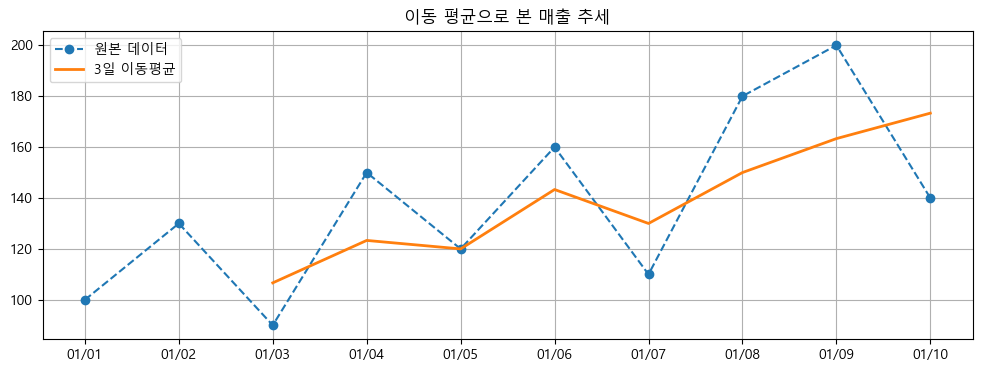

In [110]:
# 예시 데이터
df = pd.DataFrame({
    "날짜": pd.date_range("2024-01-01", periods=10, freq="D"),
    "매출": [100, 130, 90, 150, 120, 160, 110, 180, 200, 140]
})
df.set_index("날짜", inplace=True)

# 날짜 포맷 바꾸기
df.index = df.index.strftime("%m/%d") 

# 이동 평균 (3일)
df["이동평균"] = df["매출"].rolling(3).mean()

# 그래프 크기 설정
plt.figure(figsize=(12,4))

# 원본 그래프
plt.plot(df.index, df["매출"], label="원본 데이터", linestyle="--", marker="o")

# 이동편균 그래프
plt.plot(df.index, df["이동평균"], label="3일 이동평균", linewidth=2)
plt.title("이동 평균으로 본 매출 추세")
plt.legend()
plt.grid(True)

In [111]:
df

,매출,이동평균
날짜,,
01/01,100,NaN
01/02,130,NaN
01/03,90,106.666667
01/04,150,123.333333
01/05,120,120.000000
01/06,160,143.333333
01/07,110,130.000000
01/08,180,150.000000
01/09,200,163.333333
